In [1]:
import os
from pathlib import Path

# 取得當前工作目錄
current = Path(os.getcwd())

# 檢查當前目錄的父目錄名稱並執行相應操作
if current.name == 'Notebooks':
    print(f"Current Path: {current}")
elif current.name == 'test_notebooks' or current.name == 'AOI':
    # 切換到上層目錄
    os.chdir('../')
    # 更新 current 變量為新的工作目錄
    current = Path(os.getcwd())
    print(f"Updated Path: {current}")
else:
    print("No matching parent directory found.")
    
import cv2  # 用於讀取圖片
import numpy as np  # 用於數學運算
import matplotlib.pyplot as plt  # 用於圖形顯示
import pathlib

from mymodules.filter.basic_filters import get_lines_hough, equalized_image, image_binary, crop

Updated Path: /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Notebooks


In [2]:
import datetime
now = datetime.datetime.now()
f"{now.date()}"

folder_path = pathlib.Path(r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf")
folder_path = folder_path / f"{now.date()}"
folder_path.mkdir(parents=True, exist_ok=True) # 確保目錄存在，不存在則創建
folder_path.as_posix()

template_folder_path = folder_path / 'template'
template_folder_path.mkdir(parents=True, exist_ok=True)

import os
origin_image_folder = pathlib.Path(r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Setup_2/Test_5_1")
origin_images = os.listdir(origin_image_folder.as_posix())
origin_images = [image for image in sorted(origin_images) if image[-4:]==".tif"]
origin_images

['5_1.tif',
 '5_2.tif',
 'F10.tif',
 'F11.tif',
 'F12.tif',
 'F24.tif',
 'F36.tif',
 'F37.tif',
 'F9.tif']

In [22]:
image_number = 0
origin_image_path = origin_image_folder / origin_images[image_number]
origin_name = origin_image_path.name

from mymodules.image_manager import ImageManager

origin_im = ImageManager(origin_image_path.as_posix())


Image changed to Red channel


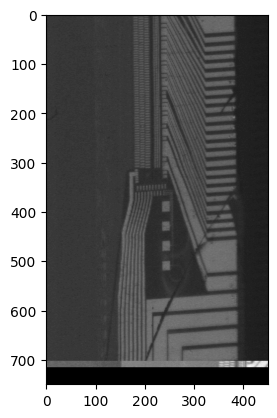

Image changed to Blue channel


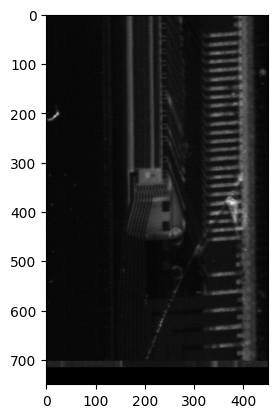

In [27]:
r_im = ImageManager(origin_image_path.as_posix())
r_im.choose_rgb('r')
r_im = r_im.process(crop, params={'x1':800,'x2': 1250, 'y1':0, 'y2':750}) # 9
r_im.show()

b_im = ImageManager(origin_image_path.as_posix())
b_im.choose_rgb('b')
b_im = b_im.process(crop, params={'x1':800,'x2': 1250, 'y1':0, 'y2':750}) # 9
b_im.show()

In [38]:
r_im.basic_array_info(), b_im.basic_array_info()

Name: crop.tif
Folder: /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Setup_2/Test_5_1
Type:  <class 'numpy.ndarray'>
Shape:  (750, 450)
Max:  54
Min:  0
Mean:  13.116722962962964
Standard Deviation:  5.821894261059211
Name: crop.tif
Folder: /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Setup_2/Test_5_1
Type:  <class 'numpy.ndarray'>
Shape:  (750, 450)
Max:  84
Min:  0
Mean:  7.386817777777778
Standard Deviation:  7.549556092379222


(None, None)

In [ ]:
origin_im.choose_rgb('r')

origin_im.show()

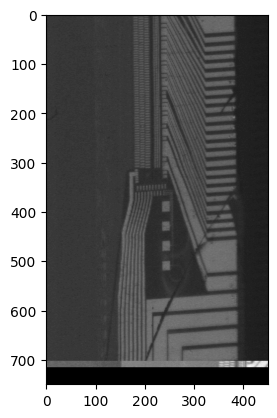

Name: crop.tif
Folder: /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Setup_2/Test_5_1
Type:  <class 'numpy.ndarray'>
Shape:  (750, 450)
Max:  54
Min:  0
Mean:  13.116722962962964
Standard Deviation:  5.821894261059211


In [17]:
origin_im = origin_im.process(crop, params={'x1':800,'x2': 1250, 'y1':0, 'y2':750}) # 9
origin_im.show()
origin_im.basic_array_info()

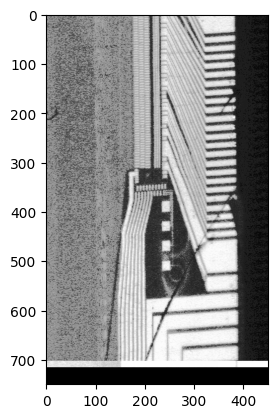

In [18]:
e_im = origin_im.process(equalized_image)
e_im.show()

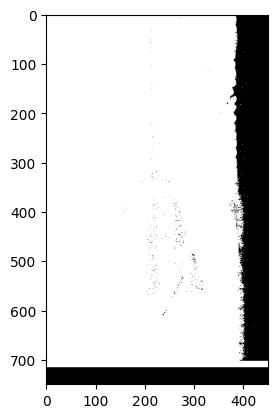

In [19]:
b_im = origin_im.process(image_binary, params={'threshold_value':8})
b_im.show()

In [20]:
image = e_im.image

In [8]:
image = origin_im.image

In [9]:
image = b_im.image

In [10]:
image = origin_im.image

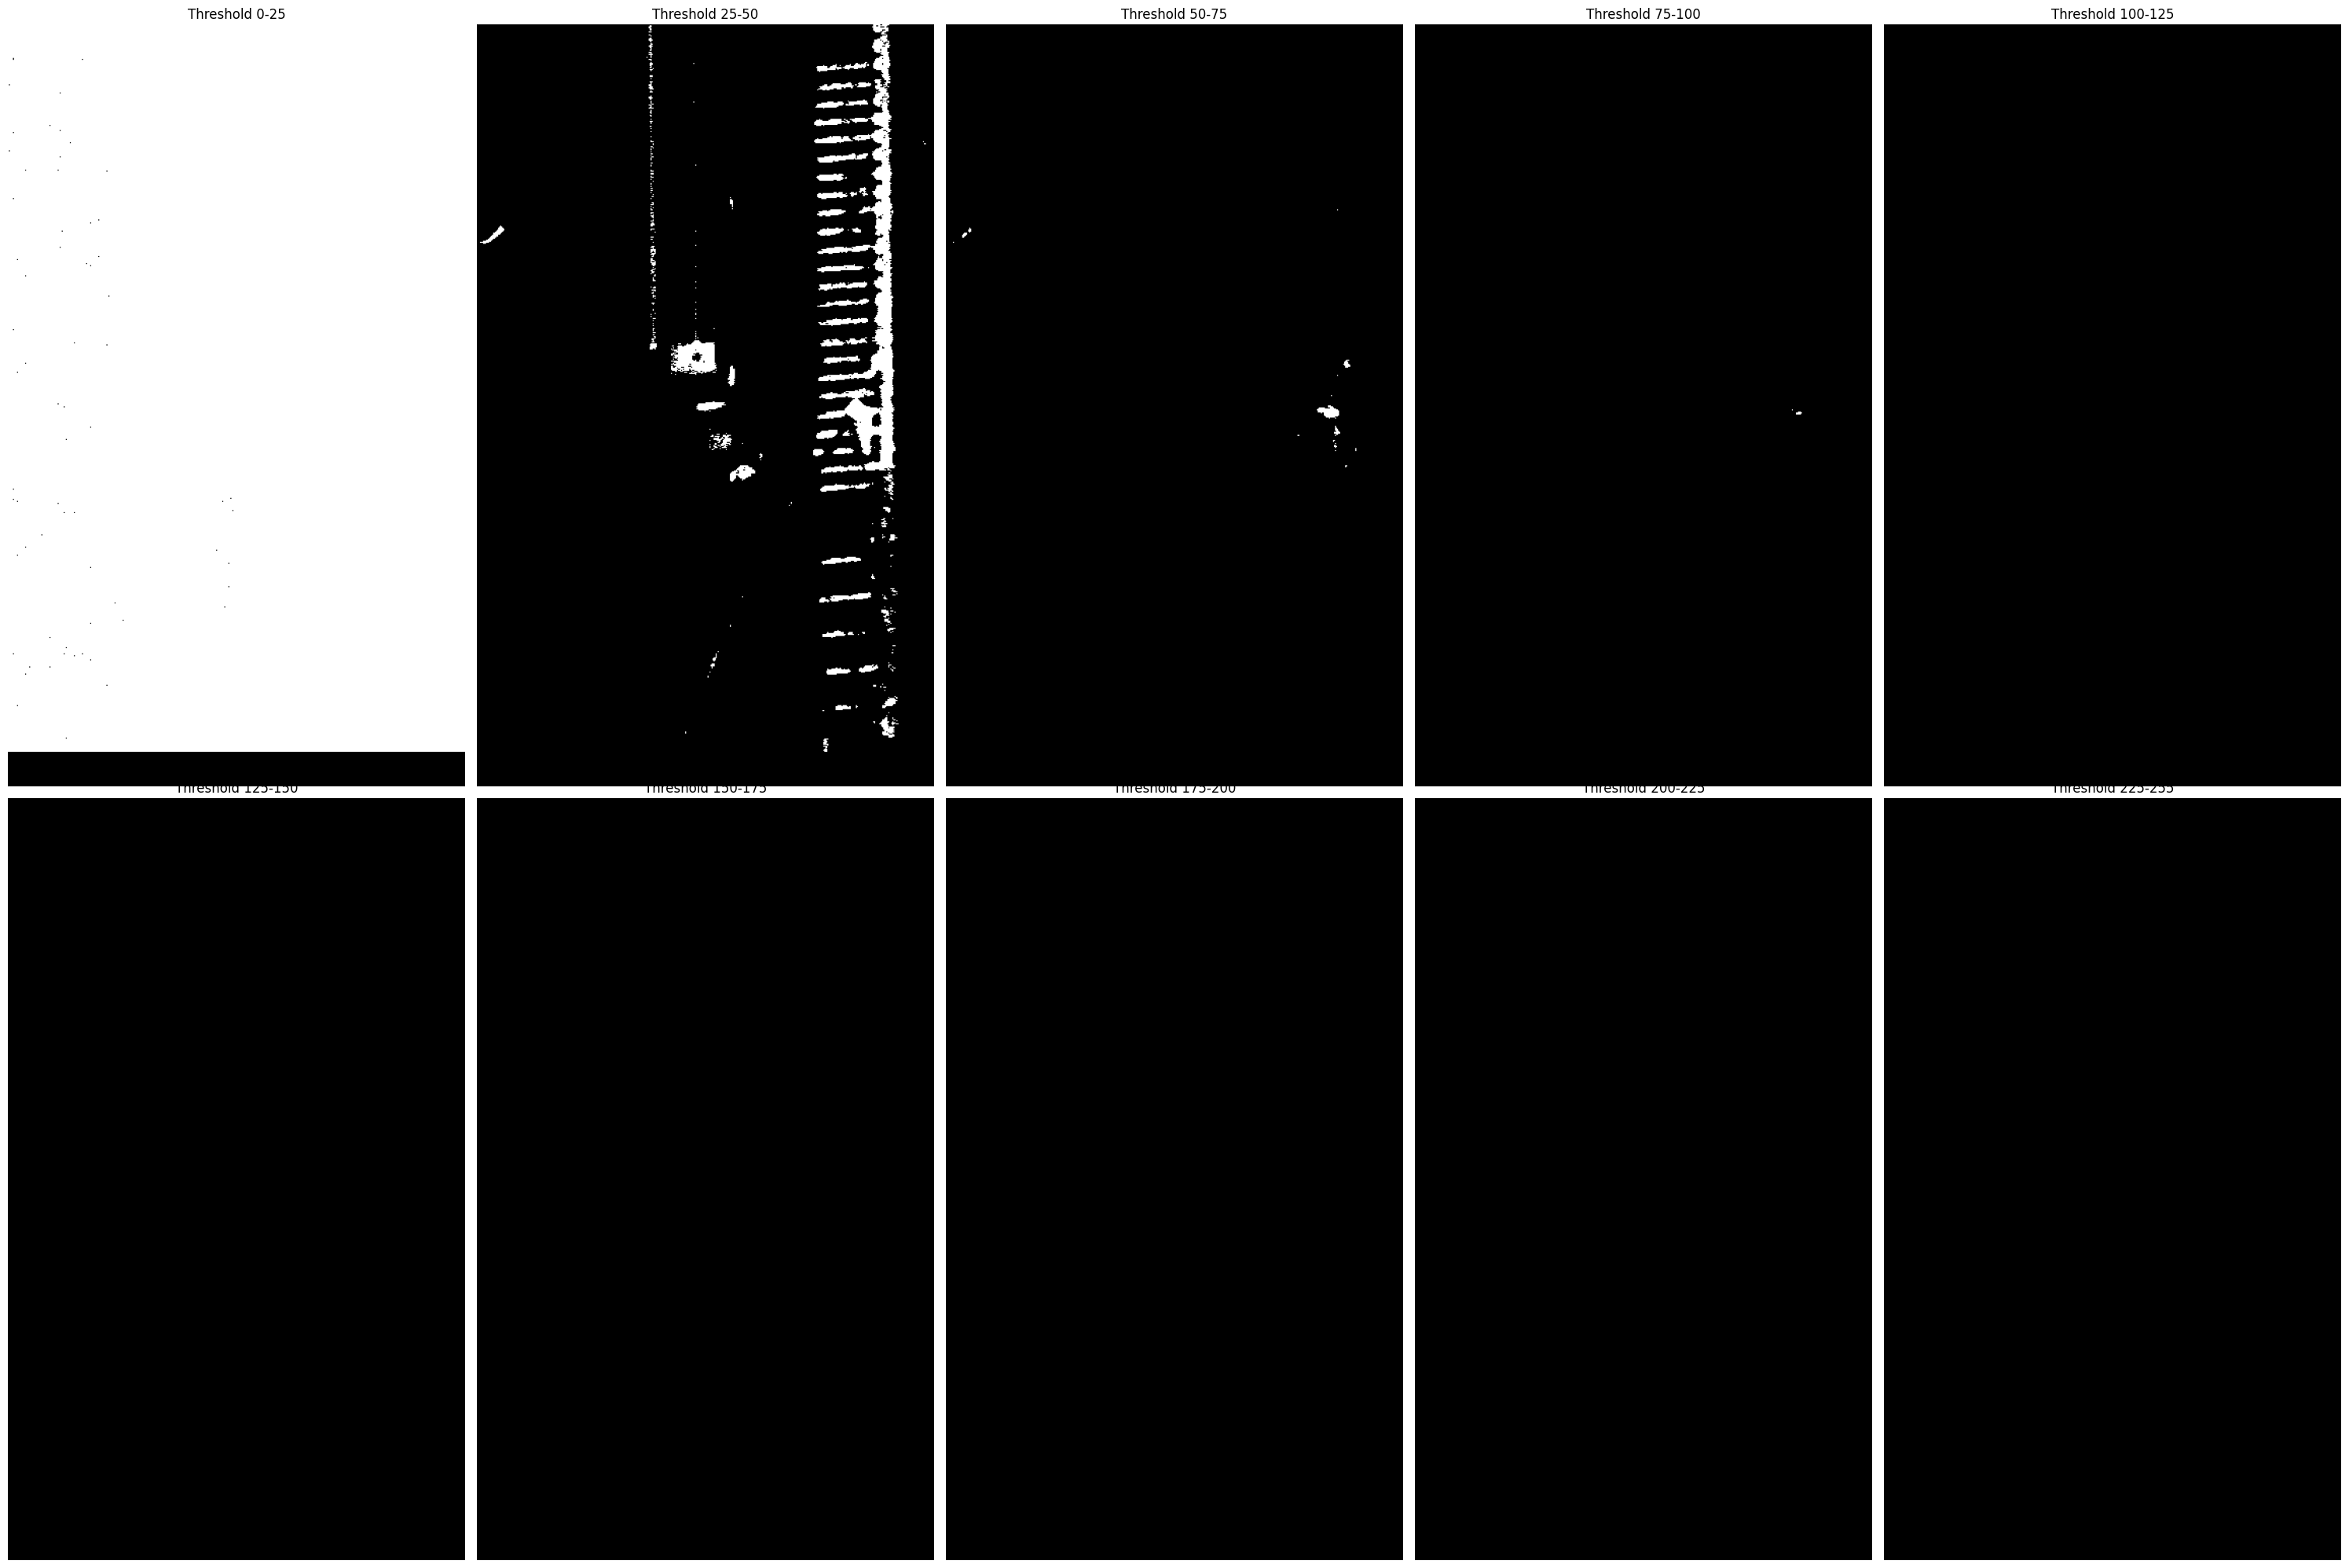

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 設置每一行的列數和總行數
num = 10
columns = 5  # 每行的列數
rows = (num + columns - 1) // columns  # 確保所有子圖都能顯示

# 創建子圖
fig, axes = plt.subplots(rows, columns, figsize=(30, 10 * rows))
axes = axes.flatten()

# 計算每個等份的閾值範圍
min_val = 0
max_val = 255
step = (max_val - min_val) // num

# 分割圖像並顯示每個等份
for i in range(num):
    # 設置當前等份的閾值範圍
    lower_thresh = min_val + i * step
    upper_thresh = min_val + (i + 1) * step if i < num - 1 else max_val

    # 使用 cv2.threshold 將圖像切成等份
    _, segmented = cv2.threshold(image, lower_thresh, upper_thresh, cv2.THRESH_BINARY)

    # 顯示結果
    axes[i].imshow(segmented, cmap='gray')
    axes[i].set_title(f"Threshold {lower_thresh}-{upper_thresh}")
    axes[i].axis('off')

# 隱藏多餘的子圖（如果總數量不是子圖總數）
for j in range(num, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


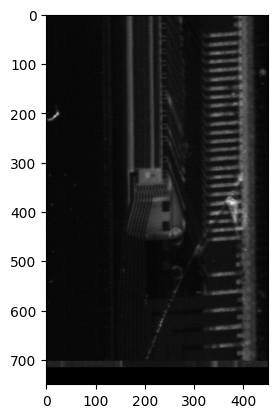

In [20]:
image = origin_im.image*3
plt.imshow(image, cmap='gray')

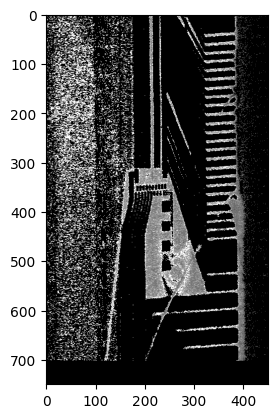

In [64]:
lower_thresh = 30
upper_thresh = 90

# 創建掩碼，保留在當前閾值區間內的像素，其他像素設為 0
mask = (image >= lower_thresh) & (image < upper_thresh)
segmented = np.zeros_like(image)
segmented[mask] = image[mask]

plt.imshow(segmented, cmap='gray')

In [14]:
image = origin_im.image * 5

In [62]:
image = e_im.image

In [24]:
image = b_im.image * 24 - r_im.image * 6

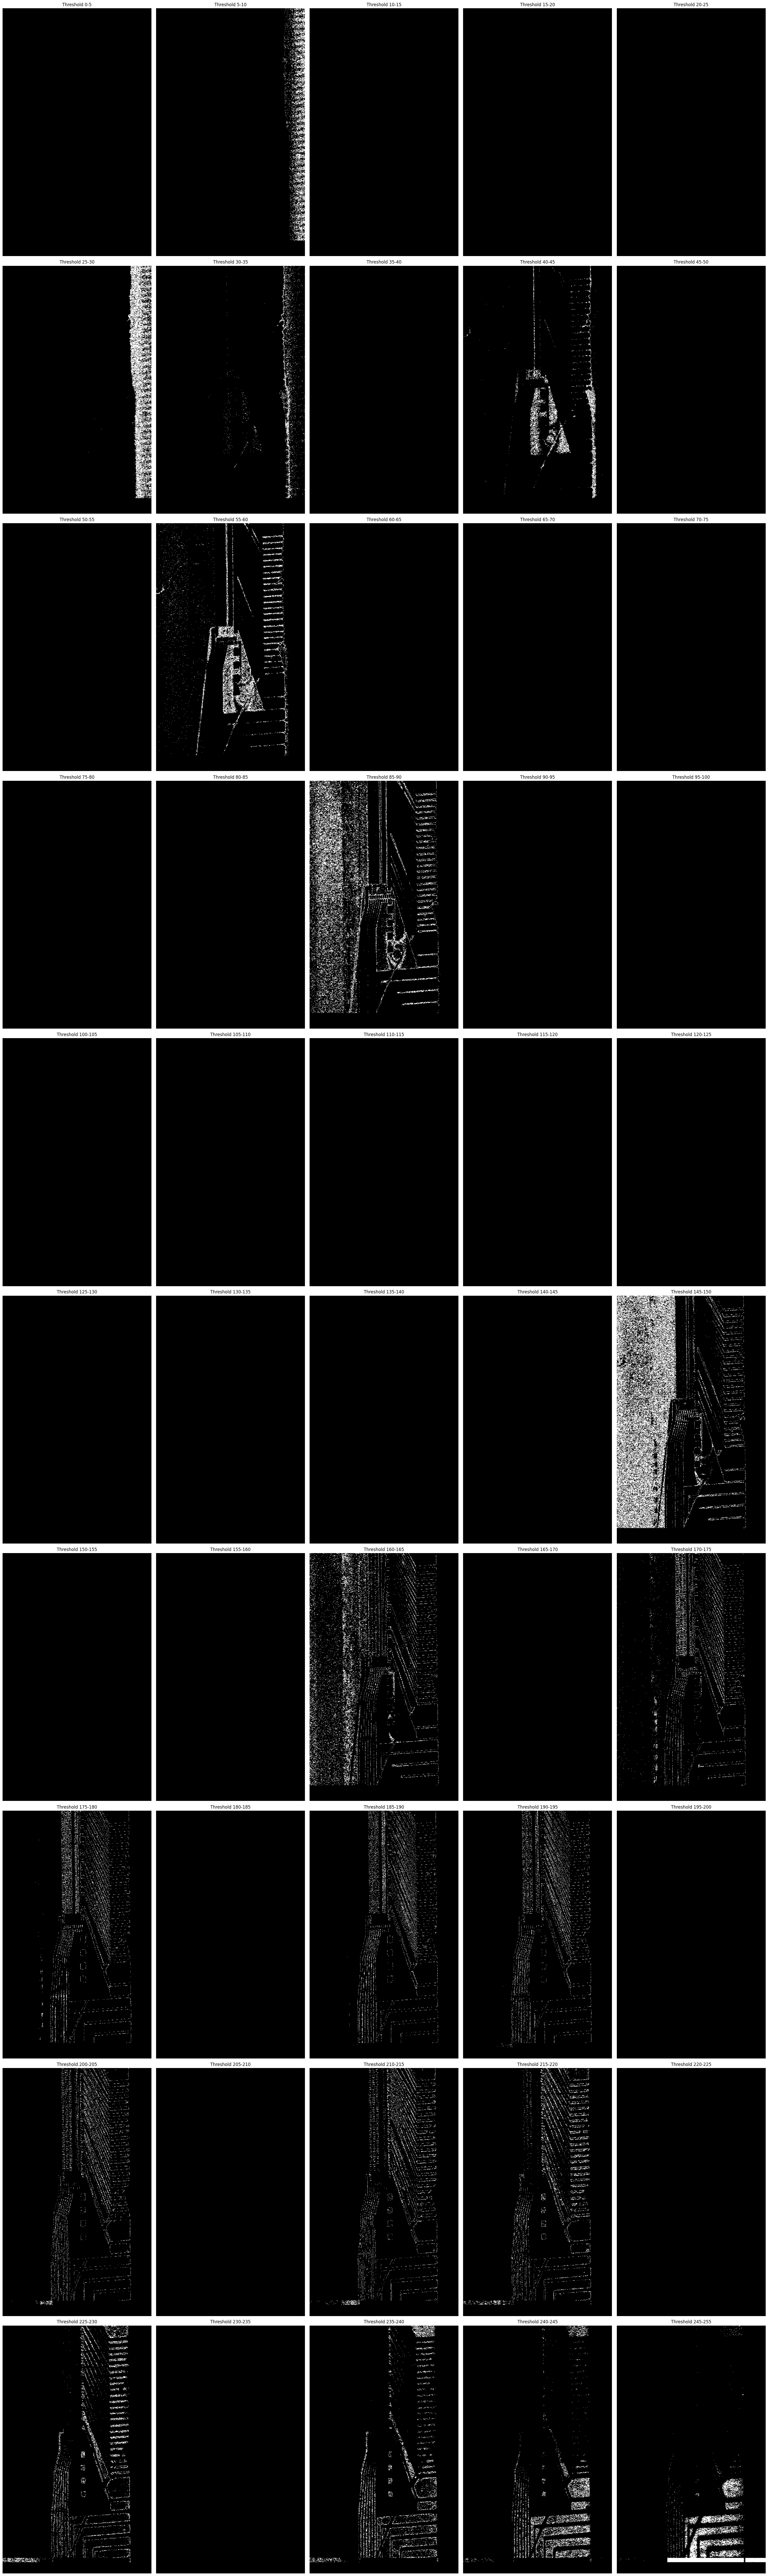

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 設置每一行的列數和總行數
num = 50
columns = 5  # 每行的列數
rows = (num + columns - 1) // columns  # 確保所有子圖都能顯示

# 創建子圖
fig, axes = plt.subplots(rows, columns, figsize=(30, 10 * rows))
axes = axes.flatten()

# 計算每個等份的閾值範圍
min_val = 0
max_val = 255
step = (max_val - min_val) // num

# 分割圖像並顯示每個等份
for i in range(num):
    # 設置當前等份的閾值範圍
    lower_thresh = min_val + i * step
    upper_thresh = min_val + (i + 1) * step if i < num - 1 else max_val

    # 創建掩碼，保留在當前閾值區間內的像素，其他像素設為 0
    mask = (image >= lower_thresh) & (image < upper_thresh)
    segmented = np.zeros_like(image)
    segmented[mask] = image[mask]

    # 顯示結果
    axes[i].imshow(segmented, cmap='gray')
    axes[i].set_title(f"Threshold {lower_thresh}-{upper_thresh}")
    axes[i].axis('off')

# 隱藏多餘的子圖（如果總數量不是子圖總數）
for j in range(num, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
